In [1]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
# 3rd-party Libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer,recall_score, roc_curve, roc_auc_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from tensorflow import keras

2023-04-25 14:23:01.502767: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 14:23:04.186371: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 14:23:04.194372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 14:23:08.842339: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
ogd_server = 'http://opengamedata.fielddaylab.wisc.edu/'
server_data_path = 'data/JOURNALISM/'
dataset_name = "JOURNALISM_20230401_to_20230417"
zip_name = f"{dataset_name}_238fd10_session-features.zip"

survey_path = 'JOURNALISM_20230401_to_20230417_238fd10_session-features.tsv'
raw_data = pd.read_csv(survey_path, sep='\t')
# Get file path and create data frame
tsv_name = f"{dataset_name}_238fd10_session-features.tsv"
survey_path = Path("./") / tsv_name
if not survey_path.is_file():
    !unzip ./{zipname} -d {dataset_name}
raw_data = pd.read_csv(survey_path, sep='\t')

In [3]:
for col, dtype in zip(raw_data, raw_data.dtypes):
  if dtype == "string":
    try:
      raw_data[col] = pd.to_timedelta(typed_draw_dataata[col])
    except:
      try:
        typed_draw_dataata[col] = pd.to_numeric(raw_data[col])
      except:
        pass
  elif dtype == "object":
      try:
        raw_data[col] = pd.to_numeric(raw_data[col])
      except:
        pass

print(f"This dataframe contains data of the following types:\n{raw_data.dtypes.unique()}\n")
print(f"Per feature, the data types are:\n{raw_data.dtypes}")

This dataframe contains data of the following types:
[dtype('O') dtype('int64') dtype('bool') dtype('float64')]

Per feature, the data types are:
PlayerID                              object
SessionID                              int64
PlayerAttributes                      object
QuitLevel                              int64
QuitLevel-EventName                   object
QuitLevel-NodeID                      object
QuitType                              object
QuitType-BetweenLevels                  bool
QuitType-OnFail                         bool
QuitType-OnCheckpoint                   bool
QuitType-Other                          bool
SkillSequenceCount                     int64
SkillSequenceCount-Event Sequence     object
TopAttribute                           int64
TopAttribute-Names                    object
TotalFails                             int64
WorstAttribute                         int64
WorstAttribute-Names                  object
lvl1_FailureCount                      int64

In [4]:
rows_to_show = 10
raw_data.head(rows_to_show)

,PlayerID,SessionID,PlayerAttributes,QuitLevel,QuitLevel-EventName,QuitLevel-NodeID,QuitType,QuitType-BetweenLevels,QuitType-OnFail,QuitType-OnCheckpoint,...,lvl2_LevelCompleted,lvl3_LevelCompleted,lvl4_LevelCompleted,lvl5_LevelCompleted,lvl1_LevelStoryAlignment,lvl2_LevelStoryAlignment,lvl3_LevelStoryAlignment,lvl4_LevelStoryAlignment,lvl5_LevelStoryAlignment,ContinuesOnFail
0,NaN,23040610403968878,"[1,2,1,2,1,1]",0,complete_level,START,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,10
1,NaN,23040711302424298,"[1,3,4,3,2,7]",3,change_location,ScienceStory2Wetlands,Other,False,False,False,...,True,True,True,True,0.000,0.000,0.000,0.00,0.0,34
2,NaN,23040713291247534,"[6,6,6,6,5,5]",4,display_choices,SnagInterviewWithMayorFailed,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,0
3,NaN,23040713304788545,"[0,0,0,0,0,0]",4,text_click,RemindTheMayor,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,1
4,SeveralFridge,23040212171216016,"[1,1,1,1,1,1]",0,display_text_dialog,@0C9004F8,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,0
5,EnoughRally,23040214002714806,"[3,3,3,3,3,0]",5,display_text_dialog,@0C9004F8,Other,False,False,False,...,True,True,True,False,0.229,0.800,0.633,0.34,0.0,2
6,SmartestIcicle,23040215195158578,"[1,4,5,4,4,0]",5,display_text_dialog,@0C9004F8,Other,False,False,False,...,True,True,True,False,-0.031,0.559,0.300,0.00,0.0,1
7,QuickFax,23040216160241931,"[1,2,2,1,1,1]",0,stat_update,@0C9004F8,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,0
8,CirclingPencil,23040216182351934,"[1,3,1,2,2,2]",1,text_click,@0C9004F8,Other,False,False,False,...,False,False,False,False,0.000,0.000,0.000,0.00,0.0,0
9,CirclingPencil,23040219035383967,"[1,2,4,2,2,7]",3,text_click,@0C9004F8,Other,False,False,False,...,True,False,False,False,-0.040,0.350,0.000,0.00,0.0,0


In [5]:
raw_data.describe(include='all')


,PlayerID,SessionID,PlayerAttributes,QuitLevel,QuitLevel-EventName,QuitLevel-NodeID,QuitType,QuitType-BetweenLevels,QuitType-OnFail,QuitType-OnCheckpoint,...,lvl2_LevelCompleted,lvl3_LevelCompleted,lvl4_LevelCompleted,lvl5_LevelCompleted,lvl1_LevelStoryAlignment,lvl2_LevelStoryAlignment,lvl3_LevelStoryAlignment,lvl4_LevelStoryAlignment,lvl5_LevelStoryAlignment,ContinuesOnFail
count,638,6.420000e+02,642,642.000000,642,642,642,642,642,642,...,642,642,642,642,642.000000,642.000000,642.000000,642.000000,642.0,642.000000
unique,393,NaN,267,NaN,24,158,2,2,1,1,...,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,FluffyAlarm,NaN,"[1,1,1,1,1,1]",NaN,display_text_dialog,@0C9004F8,Other,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,NaN,133,NaN,279,48,605,605,642,642,...,529,564,586,601,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.304092e+16,NaN,1.705607,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.018699,0.082575,0.045589,0.010793,0.0,0.823988
std,NaN,4.404507e+11,NaN,1.937140,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.087832,0.197970,0.134549,0.065212,0.0,9.624552
min,NaN,2.304021e+16,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.366000,-0.140000,0.000000,0.000000,0.0,0.000000
25%,NaN,2.304052e+16,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,NaN,2.304091e+16,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,NaN,2.304131e+16,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [6]:
df_session = raw_data.dropna()


In [7]:
for col in df_session.columns:
    dtype = df_session[col].dtype
    if dtype == bool:
        # convert the boolean column to integer (1 for True and 0 for False)
        df_session[col] = df_session[col].astype(int)

/tmp/ipykernel_476/182096567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session[col] = df_session[col].astype(int)
/tmp/ipykernel_476/182096567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_session[col] = df_session[col].astype(int)
/tmp/ipykernel_476/182096567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [8]:
df_session

,PlayerID,SessionID,PlayerAttributes,QuitLevel,QuitLevel-EventName,QuitLevel-NodeID,QuitType,QuitType-BetweenLevels,QuitType-OnFail,QuitType-OnCheckpoint,...,lvl2_LevelCompleted,lvl3_LevelCompleted,lvl4_LevelCompleted,lvl5_LevelCompleted,lvl1_LevelStoryAlignment,lvl2_LevelStoryAlignment,lvl3_LevelStoryAlignment,lvl4_LevelStoryAlignment,lvl5_LevelStoryAlignment,ContinuesOnFail
4,SeveralFridge,23040212171216016,"[1,1,1,1,1,1]",0,display_text_dialog,@0C9004F8,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
5,EnoughRally,23040214002714806,"[3,3,3,3,3,0]",5,display_text_dialog,@0C9004F8,Other,0,0,0,...,1,1,1,0,0.229,0.800,0.633,0.34,0.0,2
6,SmartestIcicle,23040215195158578,"[1,4,5,4,4,0]",5,display_text_dialog,@0C9004F8,Other,0,0,0,...,1,1,1,0,-0.031,0.559,0.300,0.00,0.0,1
7,QuickFax,23040216160241931,"[1,2,2,1,1,1]",0,stat_update,@0C9004F8,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
8,CirclingPencil,23040216182351934,"[1,3,1,2,2,2]",1,text_click,@0C9004F8,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,FondSalon,23041712514228403,"[1,1,1,1,1,1]",0,display_text_dialog,OnMyWay,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
638,AwareTry,23041715290435554,"[1,1,1,1,1,1]",0,display_text_dialog,START,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
639,ReigningChrome,23041721101477592,"[1,2,1,1,3,2]",0,stat_update,TakeSomePhotos,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0
640,ReigningChrome,23041721135018339,"[1,1,1,1,2,2]",0,display_text_dialog,OffToWork,Other,0,0,0,...,0,0,0,0,0.000,0.000,0.000,0.00,0.0,0


In [9]:
df_session.dtypes

PlayerID                              object
SessionID                              int64
PlayerAttributes                      object
QuitLevel                              int64
QuitLevel-EventName                   object
QuitLevel-NodeID                      object
QuitType                              object
QuitType-BetweenLevels                 int64
QuitType-OnFail                        int64
QuitType-OnCheckpoint                  int64
QuitType-Other                         int64
SkillSequenceCount                     int64
SkillSequenceCount-Event Sequence     object
TopAttribute                           int64
TopAttribute-Names                    object
TotalFails                             int64
WorstAttribute                         int64
WorstAttribute-Names                  object
lvl1_FailureCount                      int64
lvl1_FailureCount-OutOfTime            int64
lvl1_FailureCount-LowAttribute         int64
lvl2_FailureCount                      int64
lvl2_Failu

In [10]:
#Parameters for cleaning

#@markdown Type a perjob feature name here
Interested_perjobfeature = 'Quit'#@param {type:"string"}
#@markdown Does it have a corresponding aggreation feature with same name? Check it if yes.
Answer  = True#@param {type:"boolean"}
id_columns = pd.Index(["SessionID", "PlayerID"])

In [11]:
#data frame we want to change to time delta
df_Interested = df_session
target_columns = df_Interested.columns[df_Interested.columns.str.contains(Interested_perjobfeature)]
df_Interested = df_Interested[id_columns.append(target_columns)].copy()
df_Interested.head()


,SessionID,PlayerID,QuitLevel,QuitLevel-EventName,QuitLevel-NodeID,QuitType,QuitType-BetweenLevels,QuitType-OnFail,QuitType-OnCheckpoint,QuitType-Other
4,23040212171216016,SeveralFridge,0,display_text_dialog,@0C9004F8,Other,0,0,0,1
5,23040214002714806,EnoughRally,5,display_text_dialog,@0C9004F8,Other,0,0,0,1
6,23040215195158578,SmartestIcicle,5,display_text_dialog,@0C9004F8,Other,0,0,0,1
7,23040216160241931,QuickFax,0,stat_update,@0C9004F8,Other,0,0,0,1
8,23040216182351934,CirclingPencil,1,text_click,@0C9004F8,Other,0,0,0,1


In [12]:
#split depending on prefix, clean columns
cols_split = []
for col in df_session.columns:
  prefix = col[0]
  if prefix.startswith('Q') or prefix.startswith('l') or prefix.startswith('T') \
  or prefix.startswith('W'):
    cols_split.append(col)
  else:
    cols_split.append(col)
col_set = Counter(cols_split)
print(f"{len(df_session.columns)} Columns in {len(col_set)} groups:")
pprint(col_set, compact=False)

44 Columns in 44 groups:
Counter({'PlayerID': 1,
         'SessionID': 1,
         'PlayerAttributes': 1,
         'QuitLevel': 1,
         'QuitLevel-EventName': 1,
         'QuitLevel-NodeID': 1,
         'QuitType': 1,
         'QuitType-BetweenLevels': 1,
         'QuitType-OnFail': 1,
         'QuitType-OnCheckpoint': 1,
         'QuitType-Other': 1,
         'SkillSequenceCount': 1,
         'SkillSequenceCount-Event Sequence': 1,
         'TopAttribute': 1,
         'TopAttribute-Names': 1,
         'TotalFails': 1,
         'WorstAttribute': 1,
         'WorstAttribute-Names': 1,
         'lvl1_FailureCount': 1,
         'lvl1_FailureCount-OutOfTime': 1,
         'lvl1_FailureCount-LowAttribute': 1,
         'lvl2_FailureCount': 1,
         'lvl2_FailureCount-OutOfTime': 1,
         'lvl2_FailureCount-LowAttribute': 1,
         'lvl3_FailureCount': 1,
         'lvl3_FailureCount-OutOfTime': 1,
         'lvl3_FailureCount-LowAttribute': 1,
         'lvl4_FailureCount': 1,
      

In [13]:
df_session.columns

Index(['PlayerID', 'SessionID', 'PlayerAttributes', 'QuitLevel',
       'QuitLevel-EventName', 'QuitLevel-NodeID', 'QuitType',
       'QuitType-BetweenLevels', 'QuitType-OnFail', 'QuitType-OnCheckpoint',
       'QuitType-Other', 'SkillSequenceCount',
       'SkillSequenceCount-Event Sequence', 'TopAttribute',
       'TopAttribute-Names', 'TotalFails', 'WorstAttribute',
       'WorstAttribute-Names', 'lvl1_FailureCount',
       'lvl1_FailureCount-OutOfTime', 'lvl1_FailureCount-LowAttribute',
       'lvl2_FailureCount', 'lvl2_FailureCount-OutOfTime',
       'lvl2_FailureCount-LowAttribute', 'lvl3_FailureCount',
       'lvl3_FailureCount-OutOfTime', 'lvl3_FailureCount-LowAttribute',
       'lvl4_FailureCount', 'lvl4_FailureCount-OutOfTime',
       'lvl4_FailureCount-LowAttribute', 'lvl5_FailureCount',
       'lvl5_FailureCount-OutOfTime', 'lvl5_FailureCount-LowAttribute',
       'lvl1_LevelCompleted', 'lvl2_LevelCompleted', 'lvl3_LevelCompleted',
       'lvl4_LevelCompleted', 'lvl5_LevelC

## Visualizations

In [14]:
#Amount of unique PlayerIDs - amount of players
len(df_session['PlayerID'])

638

In [15]:
df_column = df_session['TopAttribute-Names'] #column must be integers


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, "['endurance', 'resourceful', 'tech', 'social', 'trust', 'research']"),
  Text(1, 0, "['endurance', 'resourceful', 'tech', 'social', 'trust']"),
  Text(2, 0, "['tech']"),
  Text(3, 0, "['resourceful', 'tech']"),
  Text(4, 0, "['resourceful']"),
  Text(5, 0, "['research']"),
  Text(6, 0, "['tech', 'research']"),
  Text(7, 0, "['resourceful', 'social']"),
  Text(8, 0, "['social']"),
  Text(9, 0, "['endurance', 'tech', 'trust', 'research']"),
  Text(10, 0, "['trust', 'research']"),
  Text(11, 0, "['resourceful', 'research']"),
  Text(12, 0, "['trust']"),
  Text(13, 0, "['resourceful', 'tech', 'social', 'trust', 'research']"),
  Text(14, 0, "['resourceful', 'trust', 'research']"),
  Text(15, 0, "['endurance', 'tech', 'social',

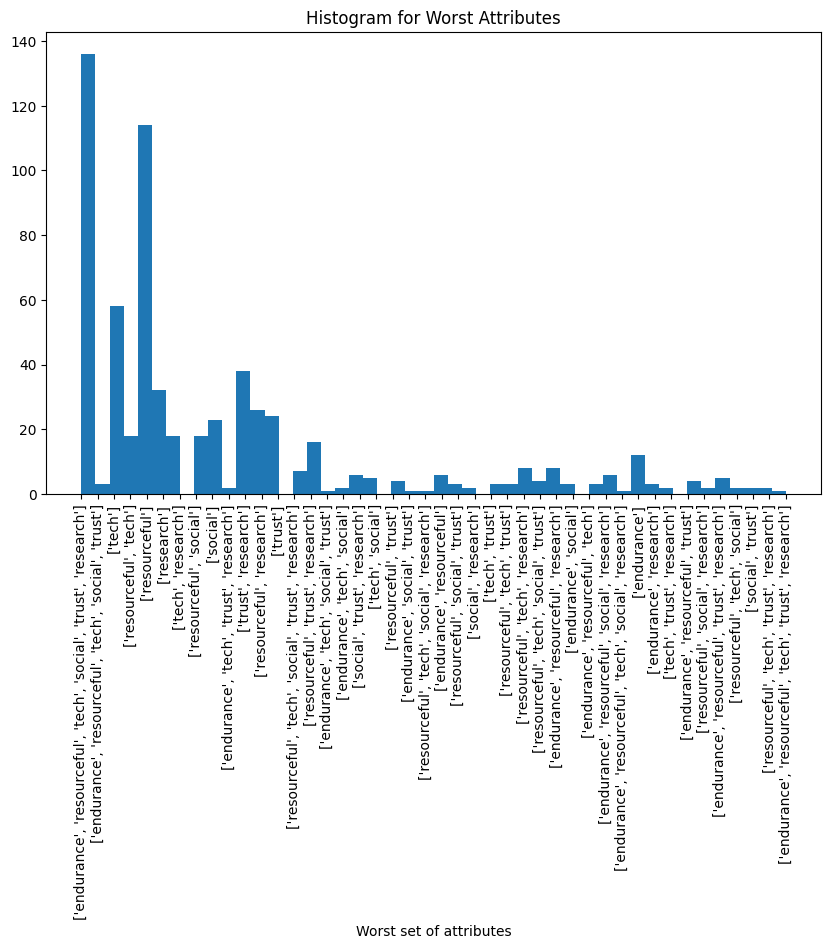

In [16]:
#top attributes
f, ax = plt.subplots(figsize= (10,6))
ax.hist(df_column, bins=50)
ax.set_xlabel("Worst set of attributes")
ax.set_title("Histogram for Worst Attributes")
plt.xticks(rotation=90)



In [17]:
df_column = df_session['WorstAttribute-Names'] #column must be integers


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, "['endurance', 'resourceful', 'tech', 'social', 'trust', 'research']"),
  Text(1, 0, "['research']"),
  Text(2, 0, "['endurance', 'social', 'trust', 'research']"),
  Text(3, 0, "['endurance', 'tech']"),
  Text(4, 0, "['endurance']"),
  Text(5, 0, "['endurance', 'research']"),
  Text(6, 0, "['endurance', 'social']"),
  Text(7, 0, "['endurance', 'tech', 'social', 'trust', 'research']"),
  Text(8, 0, "['endurance', 'tech', 'research']"),
  Text(9, 0, "['resourceful', 'social']"),
  Text(10, 0, "['endurance', 'resourceful', 'tech', 'social']"),
  Text(11, 0, "['endurance', 'resourceful', 'social']"),
  Text(12, 0, "['endurance', 'tech', 'social']"),
  Text(13, 0, "['endurance', 'tech', 'trust', 'research']"),

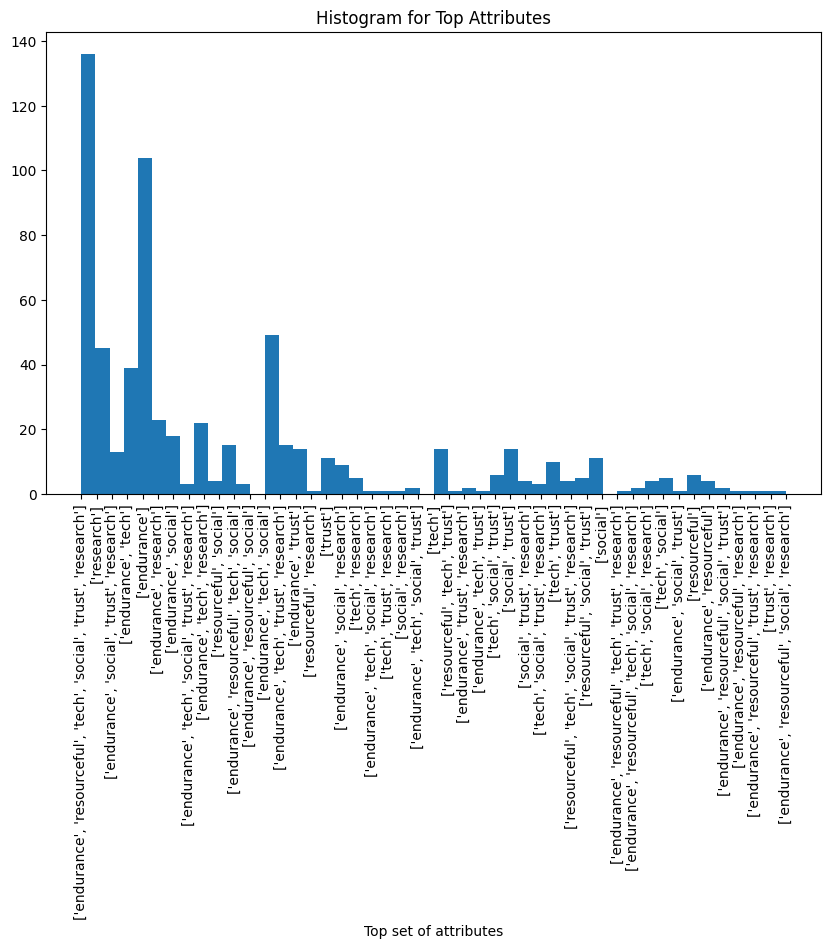

In [18]:
#jobs completed
f, ax = plt.subplots(figsize= (10,6))
ax.hist(df_column, bins=50)
ax.set_xlabel("Top set of attributes")
ax.set_title("Histogram for Top Attributes")
plt.xticks(rotation=90)


In [26]:
df_column = df_session['QuitLevel'] #column must be integers


The average amount of levels completed: 1.6990595611285266


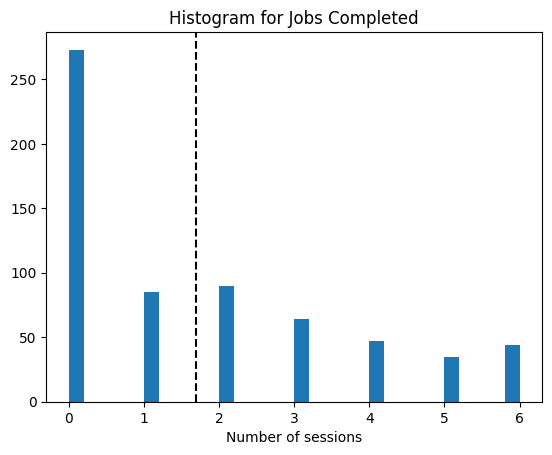

In [27]:
#jobs completed
f, ax = plt.subplots()
ax.hist(df_column, bins=30)
ax.axvline(x=df_column.mean(), linestyle='--', color='k', label="Median")
ax.set_xlabel("Number of sessions")
ax.set_title("Histogram for Jobs Completed")
print(f'The average amount of levels completed: {df_column.mean()}')

/tmp/ipykernel_476/2612279508.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_session[target_cols].hist(ax=ax, bins = 2)


array([[<Axes: title={'center': 'lvl1_LevelCompleted'}>,
        <Axes: title={'center': 'lvl2_LevelCompleted'}>],
       [<Axes: title={'center': 'lvl3_LevelCompleted'}>,
        <Axes: title={'center': 'lvl4_LevelCompleted'}>],
       [<Axes: title={'center': 'lvl5_LevelCompleted'}>, <Axes: >]],
      dtype=object)

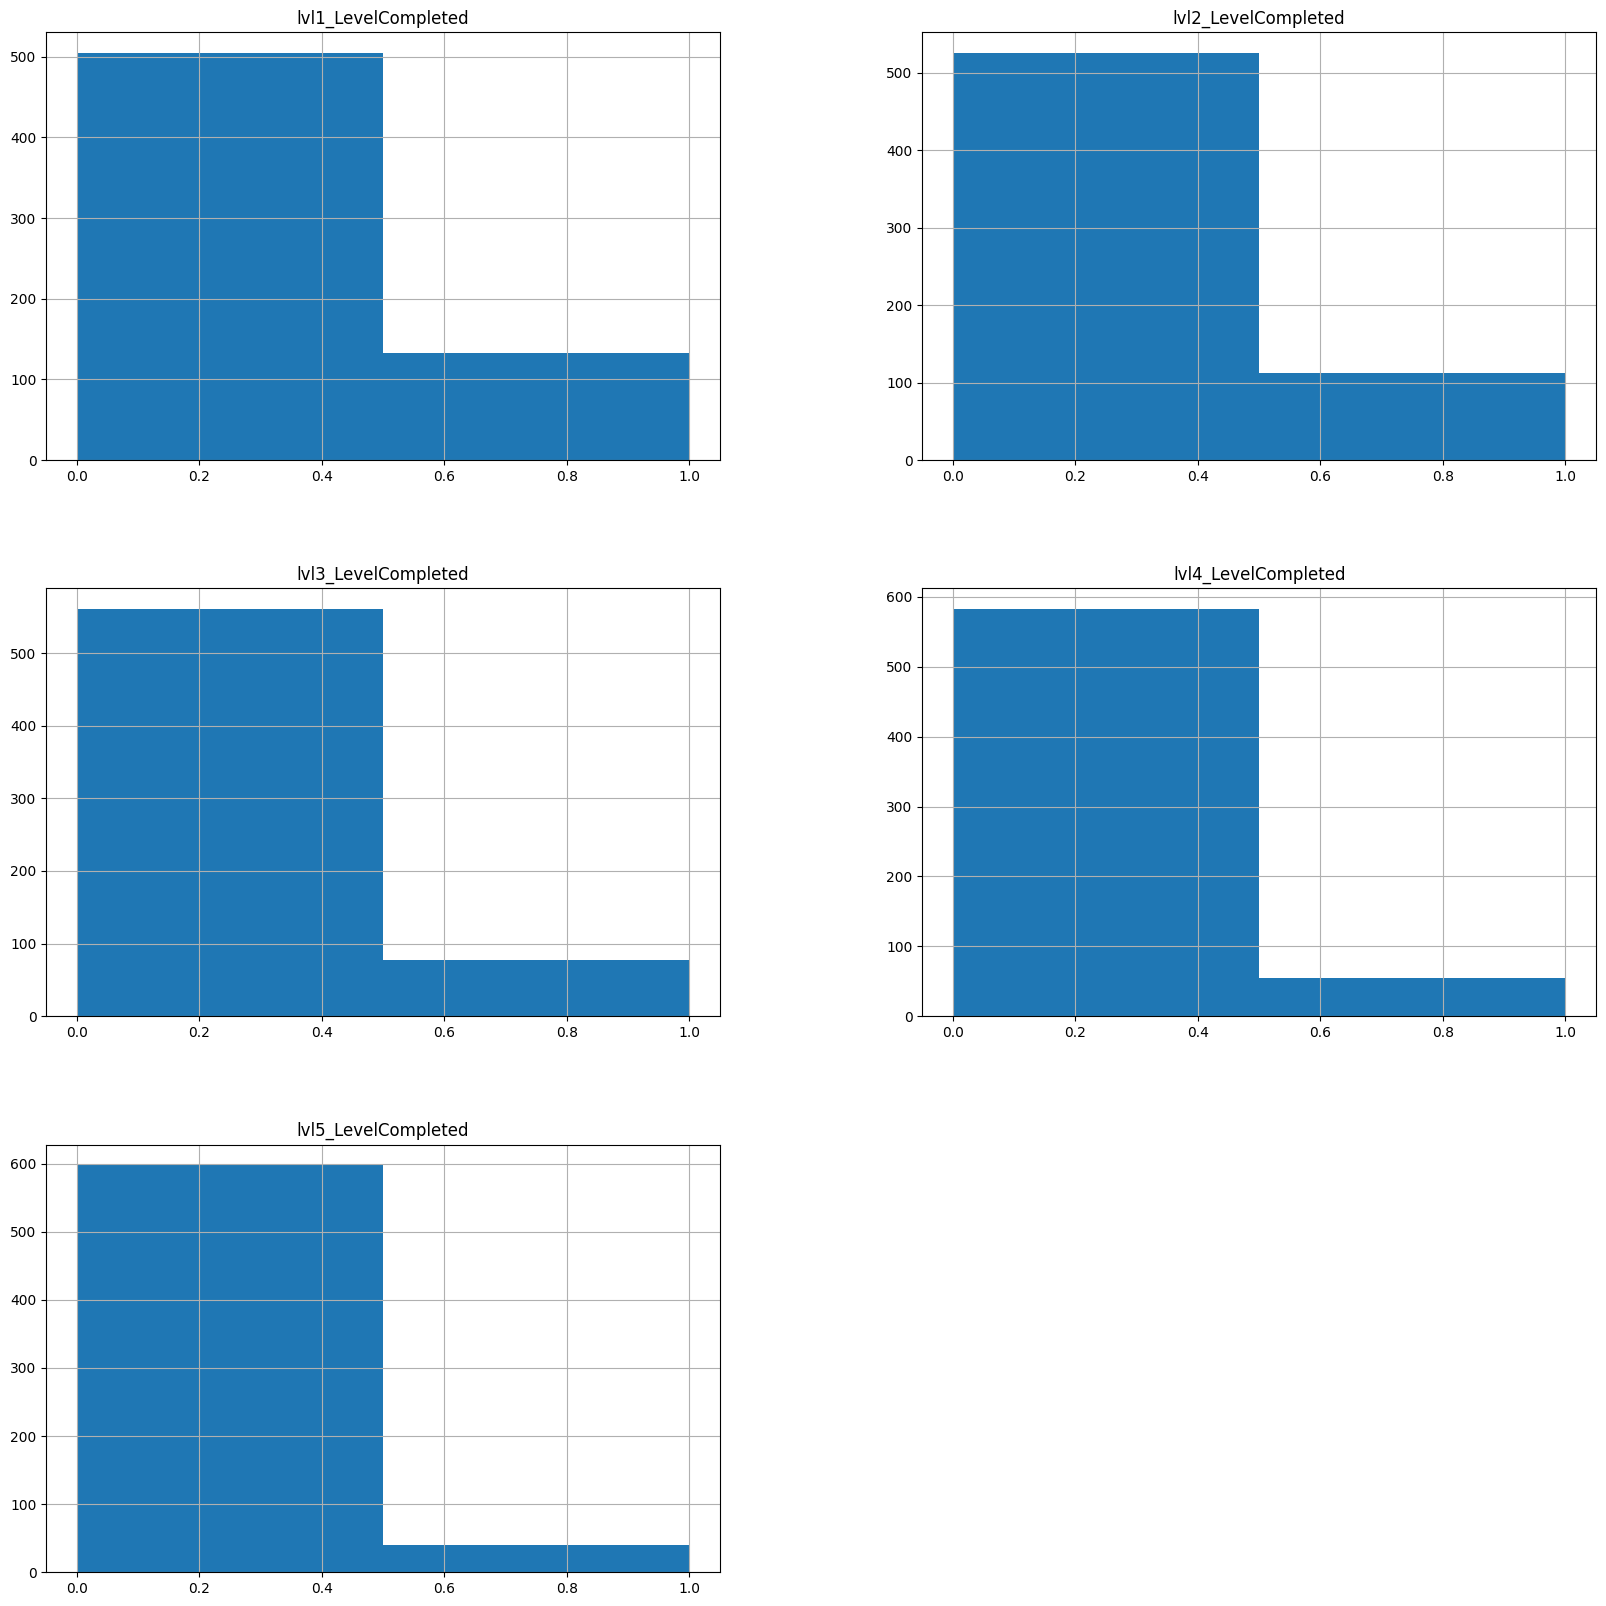

In [21]:
target_cols = ['lvl1_LevelCompleted', 'lvl2_LevelCompleted', 'lvl3_LevelCompleted',
       'lvl4_LevelCompleted', 'lvl5_LevelCompleted']
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
df_session[target_cols].hist(ax=ax, bins = 2)
